# Perkenalan

Nama : Pramudya Adi Nugraha

Batch : 10

Dataset : heart failure clinical records

Objective :
- Mampu memahami konsep Classification dengan Ensemble Model.
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model.
- Mampu mengimplementasikan Ensemble Model untuk membuat prediksi.

# Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats
from scipy.stats import norm
from feature_engine.outliers import OutlierTrimmer, Winsorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
# Load Dataset 

data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
# Melihat 5 data teratas

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Duplicate Dataset

data_copy = data.copy()

In [5]:
# Check Dataset Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# Check dataset column

data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
# Dataset describe

data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Exploratory Data Analysis (EDA)

In [8]:
# mencari tahu shape dari dataset

data.shape

(299, 13)

In [9]:
# mencari tahu jumlah missing data pada masing-masing kolom

data_miss = data.isnull().sum()
data_miss.sort_values()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

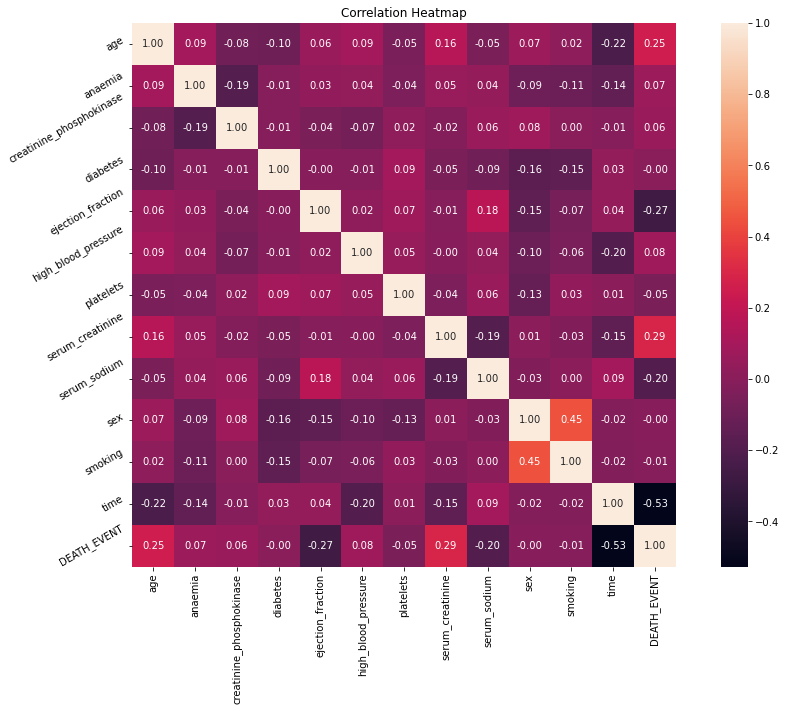

In [10]:
# mencari tahu hubungan antar column pada datset dengan menggunakan heatmap 

correlation = data.corr()

plt.figure(figsize=(16,10))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [11]:
# Mencari tahu tabel yang memiliki bentuk numerical dan catagorical

data_num = data.select_dtypes(include= np.number).columns.tolist()
data_cat = data.select_dtypes(include=['object']).columns.tolist()

print('Kolom bertype numeric pada dataset :', data_num)
print('Kolom bertype catagorical pada dataset :', data_cat)

Kolom bertype numeric pada dataset : ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
Kolom bertype catagorical pada dataset : []


In [12]:
# Check unique values in `DEATH_EVENT` Column

data['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

In [13]:
# Frekuensi distribusi value pada kolom `DEATH_EVENT`

data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [14]:
# Frekuensi distribusi value pada kolom `DEATH_EVENT` dalam persentase

data['DEATH_EVENT'].value_counts()/len(data) * 100

0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64

# Data Preprocessing

In [15]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [16]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state= 18)
data_inf_clear = data_inf.dropna()
data_inf_clear

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
265,50.0,1,298,0,35,0,362000.00,0.90,140,1,1,240,0
131,60.0,1,1082,1,45,0,250000.00,6.10,131,1,0,107,0
29,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26,1
91,60.0,0,897,1,45,0,297000.00,1.00,133,1,0,80,0
135,75.0,0,582,0,40,0,263358.03,1.18,137,1,0,107,0
51,53.0,1,91,0,20,1,418000.00,1.40,139,0,0,43,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1
180,40.0,0,478,1,30,0,303000.00,0.90,136,1,0,148,0
231,70.0,0,93,0,35,0,185000.00,1.10,134,1,1,208,0
285,55.0,1,170,1,40,0,336000.00,1.20,135,1,0,250,0


In [17]:
# Remove Inference-Set from Dataset

data_new = data.drop(data_inf_clear.index)
data_new

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [18]:
# Reset Index

data_new.reset_index(drop=True, inplace=True)
data_inf_clear.reset_index(drop=True, inplace=True)
data_inf_clear

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,50.0,1,298,0,35,0,362000.00,0.90,140,1,1,240,0
1,60.0,1,1082,1,45,0,250000.00,6.10,131,1,0,107,0
2,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26,1
3,60.0,0,897,1,45,0,297000.00,1.00,133,1,0,80,0
4,75.0,0,582,0,40,0,263358.03,1.18,137,1,0,107,0
5,53.0,1,91,0,20,1,418000.00,1.40,139,0,0,43,1
6,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1
7,40.0,0,478,1,30,0,303000.00,0.90,136,1,0,148,0
8,70.0,0,93,0,35,0,185000.00,1.10,134,1,1,208,0
9,55.0,1,170,1,40,0,336000.00,1.20,135,1,0,250,0


## Splitting Dataset

In [19]:
# Split between X (features) and y (target)

X = data_new.drop('DEATH_EVENT', axis=1)
y = data_new['DEATH_EVENT']
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
284,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
285,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
286,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
287,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
284    0
285    0
286    0
287    0
288    0
Name: DEATH_EVENT, Length: 289, dtype: int64

In [21]:
# Split between Train-Set and Test-Set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

print('X Train Size : ', X_train.shape)
print('X Test Size  : ', X_test.shape)
print('y Train Size : ', y_train.shape)
print('y Test Size  : ', y_test.shape)

X Train Size :  (231, 12)
X Test Size  :  (58, 12)
y Train Size :  (231,)
y Test Size  :  (58,)


---
## Handling Outlier

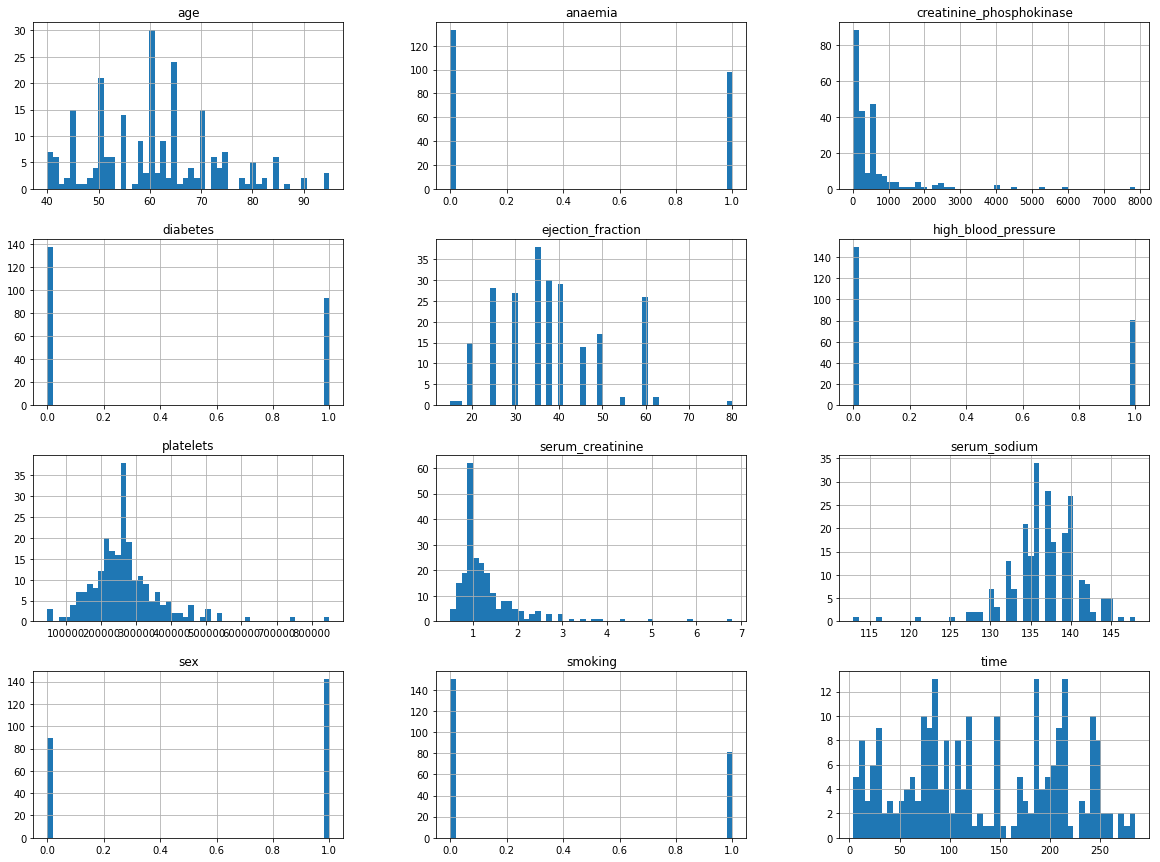

In [22]:
# Mencari tahu distribusi data dan visualisasi

X_train.hist(bins=50, figsize=(20,15))
plt.show()

In [23]:
def skew_func (data, column):
    skewness = data[column].skew(axis = 0, skipna = True)
    print(f'Skewness of {column} = ', skewness)

In [24]:
num_columns = X_train.select_dtypes(include= np.number).columns.tolist()

In [25]:
for column in num_columns:
    skew_func(data, column)

Skewness of age =  0.42306190672863536
Skewness of anaemia =  0.2782606644055605
Skewness of creatinine_phosphokinase =  4.463110084653752
Skewness of diabetes =  0.3339286842537603
Skewness of ejection_fraction =  0.5553827516973211
Skewness of high_blood_pressure =  0.6267318547287857
Skewness of platelets =  1.4623208382757793
Skewness of serum_creatinine =  4.455995882049026
Skewness of serum_sodium =  -1.0481360160574988
Skewness of sex =  -0.6267318547287857
Skewness of smoking =  0.770348815438949
Skewness of time =  0.12780264559841184


In [26]:
def outiers_val(data, column):
    skewness = data[column].skew(axis = 0, skipna = True)
    if skewness <= 0.5 and skewness >= -0.5:
        batas_atas = data[column].mean() + data[column].std()
        batas_bawah =  data[column].mean() - data[column].std()
        print('[Normal]')
        print(f'Batas atas {column} = {batas_atas}')
        print(f'Batas bawah {column} = {batas_bawah}')
        print('Total data melebihi batas atas : {}'.format(len(data[data[column] > batas_atas])))
        print('Total data kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah])))
        print('% melebihi batas atas : {}'.format(len(data[data[column] > batas_atas]) / len(data) * 100 ))
        print('% kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah]) / len(data) * 100 ))
        print('-'*100)
    else:
        IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
        batas_bawah = data[column].quantile(0.25) - (IQR * 1.5)
        batas_atas = data[column].quantile(0.75) + (IQR * 1.5)
        print('[Skewed]')
        print(f'Batas atas dari {column} = {batas_atas}')
        print(f'Batas bawah dari {column} = {batas_bawah}')
        print('Total data melebihi batas atas : {}'.format(len(data[data[column] > batas_atas])))
        print('Total data kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah])))
        print('% melebihi batas atas : {}'.format(len(data[data[column] > batas_atas]) / len(data) * 100 ))
        print('% kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah]) / len(data) * 100 ))
        print('-'*100)

In [27]:
num_data_outlier = X_train.select_dtypes(include= np.number).columns.tolist()

In [28]:
for features in num_data_outlier:
    outiers_val(X_train, features)

[Normal]
Batas atas age = 72.69907751508438
Batas bawah age = 48.62848958448272
Total data melebihi batas atas : 34
Total data kurang dari batas bawah : 35
% melebihi batas atas : 14.71861471861472
% kurang dari batas bawah : 15.151515151515152
----------------------------------------------------------------------------------------------------
[Normal]
Batas atas anaemia = 0.919543134063114
Batas bawah anaemia = -0.07105828557826555
Total data melebihi batas atas : 98
Total data kurang dari batas bawah : 0
% melebihi batas atas : 42.42424242424242
% kurang dari batas bawah : 0.0
----------------------------------------------------------------------------------------------------
[Skewed]
Batas atas dari creatinine_phosphokinase = 1282.5
Batas bawah dari creatinine_phosphokinase = -585.5
Total data melebihi batas atas : 21
Total data kurang dari batas bawah : 0
% melebihi batas atas : 9.090909090909092
% kurang dari batas bawah : 0.0
------------------------------------------------------

### Capping

In [29]:
# Akan dilakukan capping pada kolom dengan persentase outlier 5 - 15% 
# Kolom yang akan dilakukan capping adalah creatinine_phosphokinase, platelets, dan serum_creatinine

print('X_train shape sebelum dilakukan handling :', X_train.shape)
outlier_trim = Winsorizer(capping_method= 'iqr',
                              tail= 'both',
                              fold = 1.5,
                              variables= ['creatinine_phosphokinase', 'platelets', 'serum_creatinine'],
                              missing_values= 'ignore')
outlier_trim.fit(X_train)

X_train = outlier_trim.transform(X_train)
print('X_train shape setelah dilakukan handling :', X_train.shape)

X_train shape sebelum dilakukan handling : (231, 12)
X_train shape setelah dilakukan handling : (231, 12)


### Trimming

In [30]:
# Akan dilakukan trmming pada kolom dengan persentase outlier > 5%
# Kolom yang akan dilakukan capping adalah ejection_fraction dan serum_sodium

print('X_train shape sebelum dilakukan handling :', X_train.shape)
outlier_trim = OutlierTrimmer(capping_method= 'iqr',
                              tail= 'both',
                              fold = 3,
                              variables= ['ejection_fraction', 'serum_sodium'],
                              missing_values= 'ignore')
outlier_trim.fit(X_train)

X_train = outlier_trim.transform(X_train)
print('X_train shape setelah dilakukan handling :', X_train.shape)

X_train shape sebelum dilakukan handling : (231, 12)
X_train shape setelah dilakukan handling : (229, 12)


In [31]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
127,46.0,0,719.0,0,40,1,263358.03,1.18,137,0,0,107
189,45.0,0,582.0,1,38,1,263358.03,1.18,137,0,0,185
197,78.0,1,64.0,0,40,0,277000.00,0.70,137,1,1,187
50,70.0,1,69.0,1,50,1,351000.00,1.00,134,0,0,44
249,58.0,0,132.0,1,38,1,253000.00,1.00,139,1,0,230
...,...,...,...,...,...,...,...,...,...,...,...,...
242,50.0,0,1282.5,0,30,1,404000.00,0.50,139,0,0,214
174,59.0,1,176.0,1,25,0,221000.00,1.00,136,1,1,150
190,65.0,0,167.0,0,30,0,259000.00,0.80,138,0,0,186
120,60.0,0,582.0,0,40,0,217000.00,2.15,134,1,0,96


In [32]:
y_train_new = y_train[X_train.index]
y_train_new.shape

(229,)

---
## Handling Missing Values

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 127 to 275
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       229 non-null    float64
 1   anaemia                   229 non-null    int64  
 2   creatinine_phosphokinase  229 non-null    float64
 3   diabetes                  229 non-null    int64  
 4   ejection_fraction         229 non-null    int64  
 5   high_blood_pressure       229 non-null    int64  
 6   platelets                 229 non-null    float64
 7   serum_creatinine          229 non-null    float64
 8   serum_sodium              229 non-null    int64  
 9   sex                       229 non-null    int64  
 10  smoking                   229 non-null    int64  
 11  time                      229 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 23.3 KB


In [34]:
# Check missing values on X_train

X_train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [35]:
# Check missing values on X_test

X_test.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [36]:
# Check missing values on y_train

y_train_new.isnull().sum()

0

In [37]:
# Check missing values on y_test

y_test.isnull().sum()

0

---
## Feature Selection

In [38]:
# Display X_train

X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
127,46.0,0,719.0,0,40,1,263358.03,1.18,137,0,0,107
189,45.0,0,582.0,1,38,1,263358.03,1.18,137,0,0,185
197,78.0,1,64.0,0,40,0,277000.00,0.70,137,1,1,187
50,70.0,1,69.0,1,50,1,351000.00,1.00,134,0,0,44
249,58.0,0,132.0,1,38,1,253000.00,1.00,139,1,0,230
...,...,...,...,...,...,...,...,...,...,...,...,...
242,50.0,0,1282.5,0,30,1,404000.00,0.50,139,0,0,214
174,59.0,1,176.0,1,25,0,221000.00,1.00,136,1,1,150
190,65.0,0,167.0,0,30,0,259000.00,0.80,138,0,0,186
120,60.0,0,582.0,0,40,0,217000.00,2.15,134,1,0,96


In [39]:
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
154,66.0,1,72,0,40,1,242000.00,1.20,134,1,0,121
125,53.0,1,270,1,35,0,227000.00,3.40,145,1,0,105
108,50.0,0,369,1,25,0,252000.00,1.60,136,1,0,90
110,60.0,1,754,1,40,1,328000.00,1.20,126,1,0,91
91,58.0,1,133,0,60,1,219000.00,1.00,141,1,0,83
132,62.0,0,281,1,35,0,221000.00,1.00,136,0,0,108
103,45.0,1,1876,1,35,0,226000.00,0.90,138,1,0,88
122,46.0,0,168,1,17,1,271000.00,2.10,124,0,0,100
41,72.0,0,127,1,50,1,218000.00,1.00,134,1,0,33
33,69.0,0,582,1,35,0,228000.00,3.50,134,1,0,30


In [40]:
y_train_table = pd.DataFrame(y_train_new, columns= ['DEATH_EVENT'])
y_train_table

,DEATH_EVENT
127,0
189,0
197,0
50,1
249,0
...,...
242,0
174,1
190,0
120,1


In [41]:
# menggabungkan X_train_handled dan y_train_table

data_kor = X_train.copy()
data_kor['DEATH_EVENT'] = y_train_table['DEATH_EVENT']
data_kor.shape

(229, 13)

<AxesSubplot:>

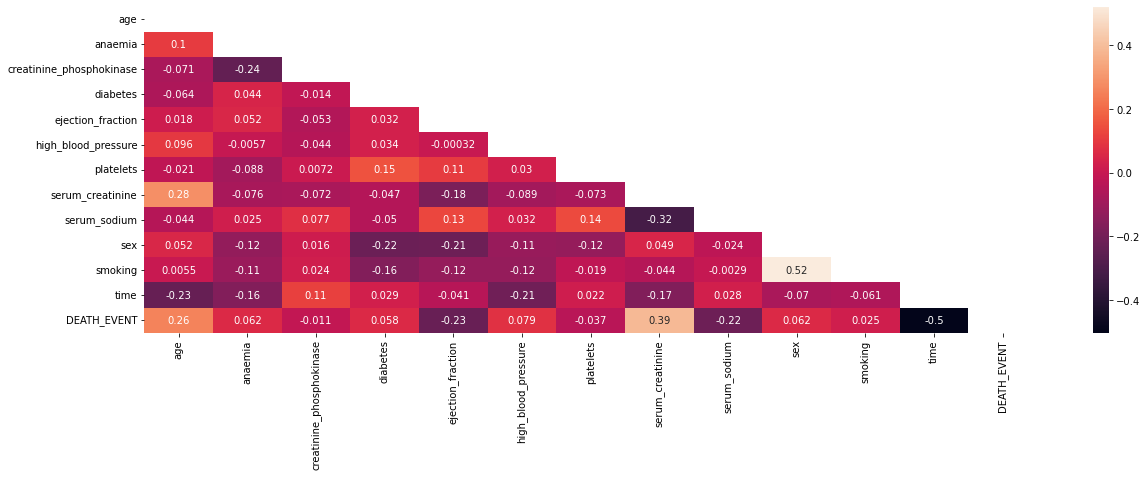

In [42]:
plt.figure(figsize=(20,6))
sns.heatmap(data_kor.corr(),annot=True, mask=np.triu(data_kor.corr()))

- Dari hasil visualisasi heatmap di atas dapat dilihat bahwa kolom yang memiliki korelasi paling tinggi terhadap kolom `y` adalah kolom `time` dan yang terkecil adalah kolom `creatinine_phosphokinase`
- kolom dengan tingkat korelasi dibawah 0.05, maka akan dilakukan drop yaitu kolom `creatinine_phosphokinase`, `platelets`, dan `smoking`

In [43]:
num_col = X_train.select_dtypes(include= np.number).columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

print('Kolom bertype numeric pada dataset :', num_col)
print('Kolom bertype catagorical pada dataset :', cat_col)

Kolom bertype numeric pada dataset : ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
Kolom bertype catagorical pada dataset : []


In [44]:
X_train.drop(['creatinine_phosphokinase', 'platelets', 'smoking'], axis = 1, inplace= True)
X_test.drop(['creatinine_phosphokinase', 'platelets', 'smoking'], axis = 1, inplace= True)

---
## Split between numerical and categorical columns


In [45]:
X_train

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,time
127,46.0,0,0,40,1,1.18,137,0,107
189,45.0,0,1,38,1,1.18,137,0,185
197,78.0,1,0,40,0,0.70,137,1,187
50,70.0,1,1,50,1,1.00,134,0,44
249,58.0,0,1,38,1,1.00,139,1,230
...,...,...,...,...,...,...,...,...,...
242,50.0,0,0,30,1,0.50,139,0,214
174,59.0,1,1,25,0,1.00,136,1,150
190,65.0,0,0,30,0,0.80,138,0,186
120,60.0,0,0,40,0,2.15,134,1,96


In [46]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include= 'object').columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['age', 'anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex', 'time']
Categorical Columns :  []


In [47]:
# Split Train-Set and Test-Set based on Column Type (Numerical/Categorical)

X_train_num = X_train[num_columns]
X_train_cat_ordinal = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat_ordinal = X_test[cat_columns]

---
## Feature Scaling

In [48]:
# Display X_train_num

X_train_num

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,time
127,46.0,0,0,40,1,1.18,137,0,107
189,45.0,0,1,38,1,1.18,137,0,185
197,78.0,1,0,40,0,0.70,137,1,187
50,70.0,1,1,50,1,1.00,134,0,44
249,58.0,0,1,38,1,1.00,139,1,230
...,...,...,...,...,...,...,...,...,...
242,50.0,0,0,30,1,0.50,139,0,214
174,59.0,1,1,25,0,1.00,136,1,150
190,65.0,0,0,30,0,0.80,138,0,186
120,60.0,0,0,40,0,2.15,134,1,96


In [49]:
# Feature Scaling using PowerTransformer

scaler = PowerTransformer()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[-1.29941499, -0.85723304, -0.81204698, ...,  0.01074769,
        -1.26580912, -0.22232918],
       [-1.41088137, -0.85723304,  1.23145585, ...,  0.01074769,
        -1.26580912,  0.71033945],
       [ 1.36940055,  1.16654393, -0.81204698, ...,  0.01074769,
         0.79000853,  0.73229154],
       ...,
       [ 0.4503158 , -0.85723304, -0.81204698, ...,  0.2702679 ,
        -1.26580912,  0.72132528],
       [ 0.04595905, -0.85723304, -0.81204698, ..., -0.73474795,
         0.79000853, -0.3699081 ],
       [-0.8767635 ,  1.16654393, -0.81204698, ...,  1.08302132,
         0.79000853,  1.38880147]])

# Model Definition

## Random Forest

In [50]:
# Training using Random Forest

model_rf = RandomForestClassifier()

## XGBoost

In [51]:
model_xgb = XGBClassifier()

# Model Training

## Random Forest

In [52]:
model_rf.fit(X_train_num_scaled, y_train_new)

RandomForestClassifier()

## XGBoost

In [53]:
model_xgb.fit(X_train_num_scaled, y_train_new)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

# Model Evaluation

## Random Forest

In [54]:
y_pred_train_rf = model_rf.predict(X_train_num_scaled)
y_pred_test_rf = model_rf.predict(X_test_num_scaled)

## XGBoost

In [55]:
y_pred_train_xgb = model_xgb.predict(X_train_num_scaled)
y_pred_test_xgb = model_xgb.predict(X_test_num_scaled)

## Evaluate model using classification report

### Random Forest

In [56]:
rf_train_cross_val = cross_val_score(model_rf, 
                                      X_train_num_scaled, 
                                      y_train_new, 
                                      cv=3, scoring="f1_weighted")

print('f1 score - All - Cross Validation  : ', rf_train_cross_val)
print('f1 score - Mean - Cross Validation : ', rf_train_cross_val.mean())
print('f1 score - Std - Cross Validation  : ', rf_train_cross_val.std())
print('f1 score - Range of Test-Set       : ', (rf_train_cross_val.mean()-rf_train_cross_val.std()) , '-', (rf_train_cross_val.mean()+rf_train_cross_val.std()))

f1 score - All - Cross Validation  :  [0.84867017 0.81578947 0.80136088]
f1 score - Mean - Cross Validation :  0.8219401743087023
f1 score - Std - Cross Validation  :  0.019797568975365342
f1 score - Range of Test-Set       :  0.8021426053333369 - 0.8417377432840676


In [57]:
print('Error - Train : \n', classification_report(y_train_new, y_pred_train_rf), '\n')
print('Error - Test  : \n', classification_report(y_test, y_pred_test_rf), '\n')

Error - Train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00        68

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229
 

Error - Test  : 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        34
           1       0.94      0.71      0.81        24

    accuracy                           0.86        58
   macro avg       0.88      0.84      0.85        58
weighted avg       0.87      0.86      0.86        58
 



Accuracy - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00        68

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229
 

Confusion Matrix      : 


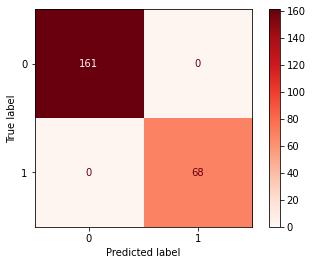

In [58]:
y_pred_train_radial = model_rf.predict(X_train_num_scaled)

print('Accuracy - Train Set  : ', accuracy_score(y_train_new, y_pred_train_radial), '\n')
print('Classification Report : \n', classification_report(y_train_new, y_pred_train_radial), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_rf, X_train_num_scaled, y_train_new, cmap='Reds'))

In [59]:
print('f1-score Train-set :', f1_score(y_train_new, y_pred_train_rf, average='weighted'))
print('f1-score Test-set:', f1_score(y_test, y_pred_test_rf, average='weighted'))
print('f1-score - Range of Test-Set : ', (rf_train_cross_val.mean()-rf_train_cross_val.std()) , '-', (rf_train_cross_val.mean()+rf_train_cross_val.std()))

f1-score Train-set : 1.0
f1-score Test-set: 0.8578085474637199
f1-score - Range of Test-Set :  0.8021426053333369 - 0.8417377432840676


### XGBoost

In [60]:
xgb_train_cross_val = cross_val_score(model_xgb, 
                                      X_train_num_scaled, 
                                      y_train_new, 
                                      cv=3, scoring="f1_weighted")

print('f1 score - All - Cross Validation  : ', xgb_train_cross_val)
print('f1 score - Mean - Cross Validation : ', xgb_train_cross_val.mean())
print('f1 score - Std - Cross Validation  : ', xgb_train_cross_val.std())
print('f1 score - Range of Test-Set       : ', (xgb_train_cross_val.mean()-xgb_train_cross_val.std()) , '-', (xgb_train_cross_val.mean()+xgb_train_cross_val.std()))

f1 score - All - Cross Validation  :  [0.83951763 0.77474088 0.84210526]
f1 score - Mean - Cross Validation :  0.8187879243438453
f1 score - Std - Cross Validation  :  0.031163870613246658
f1 score - Range of Test-Set       :  0.7876240537305986 - 0.8499517949570919


In [61]:
print('Error - Train : \n', classification_report(y_train_new, y_pred_train_xgb), '\n')
print('Error - Test  : \n', classification_report(y_test, y_pred_test_xgb), '\n')

Error - Train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00        68

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229
 

Error - Test  : 
               precision    recall  f1-score   support

           0       0.82      0.94      0.88        34
           1       0.89      0.71      0.79        24

    accuracy                           0.84        58
   macro avg       0.86      0.82      0.83        58
weighted avg       0.85      0.84      0.84        58
 



Accuracy - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00        68

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229
 

Confusion Matrix      : 


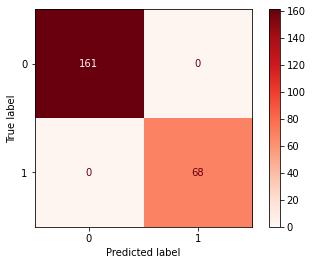

In [62]:
y_pred_train_xgb = model_xgb.predict(X_train_num_scaled)

print('Accuracy - Train Set  : ', accuracy_score(y_train_new, y_pred_train_xgb), '\n')
print('Classification Report : \n', classification_report(y_train_new, y_pred_train_xgb), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_xgb, X_train_num_scaled, y_train_new, cmap='Reds'))

In [63]:
print('f1-score Train-set :', f1_score(y_train_new, y_pred_train_xgb, average='weighted'))
print('f1-score Test-set:', f1_score(y_test, y_pred_test_xgb, average='weighted'))
print('f1-score - Range of Test-Set : ', (xgb_train_cross_val.mean()-xgb_train_cross_val.std()) , '-', (xgb_train_cross_val.mean()+xgb_train_cross_val.std()))

f1-score Train-set : 1.0
f1-score Test-set: 0.841120058002219
f1-score - Range of Test-Set :  0.7876240537305986 - 0.8499517949570919


- Dari hasil percobaan pemodelan menggunakan Random forest dan XGBoost didapatkan nilai f-1 score terbaik yaitu pada pemodelan menggunakan Random forest dengan nilai f1 - score pada Test - set yang lebih besar yaitu : 0.8596307906652734 dibandingkan dengan menggunakan XGBoost senilai : 0.841120058002219
- Selanjutnya pemodelan Random forest akan dilakukan Hyperparameter tunning untuk menentukan parameter terbaik yang dapat digunakan untuk mendapatkan hasil pemodelan yang lebih maksimal

### Hyperparameter tunning

In [64]:
RandomForestClassifier._get_param_names()

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [65]:
param_grid = {
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [5, 20, 50, 100]
        }

rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=param_grid,
                         cv=3,
                         n_jobs=-1,
                         verbose=2)

rf_gridcv.fit(X_train_num_scaled, y_train_new)

Fitting 3 folds for each of 1584 candidates, totalling 4752 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 20, 50, 100]},
             verbose=2)

In [66]:
# Get Best Hyperparameters

rf_gridcv.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 20}

In [67]:
# Get Best Estimator

rf_gridcv_best = rf_gridcv.best_estimator_

In [68]:
# Check Performance Model against Test-Set

y_pred_test_rf_best = rf_gridcv_best.predict(X_test_num_scaled)

f1-score - Test-set before tunning   :  0.8578085474637199 

f1 score - Test Set after tunning    :  0.894723092998955 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92        34
           1       0.95      0.79      0.86        24

    accuracy                           0.90        58
   macro avg       0.91      0.88      0.89        58
weighted avg       0.90      0.90      0.89        58
 

Confusion Matrix      : 


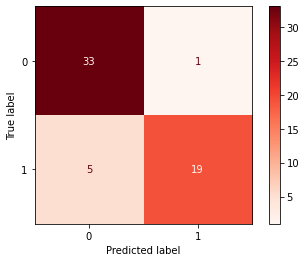

In [69]:
print('f1-score - Test-set before tunning   : ', f1_score(y_test, y_pred_test_rf, average='weighted'), '\n')
print('f1 score - Test Set after tunning    : ', f1_score(y_test, y_pred_test_rf_best, average= 'weighted'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_rf_best), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_test_num_scaled, y_test, cmap='Reds'))

# Model Inference

In [70]:
# Display Inference-Set

data_inf_clear

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,50.0,1,298,0,35,0,362000.00,0.90,140,1,1,240,0
1,60.0,1,1082,1,45,0,250000.00,6.10,131,1,0,107,0
2,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26,1
3,60.0,0,897,1,45,0,297000.00,1.00,133,1,0,80,0
4,75.0,0,582,0,40,0,263358.03,1.18,137,1,0,107,0
5,53.0,1,91,0,20,1,418000.00,1.40,139,0,0,43,1
6,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1
7,40.0,0,478,1,30,0,303000.00,0.90,136,1,0,148,0
8,70.0,0,93,0,35,0,185000.00,1.10,134,1,1,208,0
9,55.0,1,170,1,40,0,336000.00,1.20,135,1,0,250,0


In [71]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf_clear[num_columns]
data_inf_cat = data_inf_clear[cat_columns]

In [72]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = scaler.transform(data_inf_num)

In [73]:
# Merge Numerical Data and Categorical Data

data_inf_final = data_inf_num_scaled

In [74]:
# Predict Inference-Set

y_pred_inf = model_rf.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Heart Failure Prediction'])

In [75]:
# Concat Inference-Set with Prediction

pd.concat([data_inf_clear, y_pred_inf_df], axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Heart Failure Prediction
0,50.0,1,298,0,35,0,362000.00,0.90,140,1,1,240,0,0
1,60.0,1,1082,1,45,0,250000.00,6.10,131,1,0,107,0,1
2,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26,1,1
3,60.0,0,897,1,45,0,297000.00,1.00,133,1,0,80,0,0
4,75.0,0,582,0,40,0,263358.03,1.18,137,1,0,107,0,0
5,53.0,1,91,0,20,1,418000.00,1.40,139,0,0,43,1,1
6,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1,1
7,40.0,0,478,1,30,0,303000.00,0.90,136,1,0,148,0,0
8,70.0,0,93,0,35,0,185000.00,1.10,134,1,1,208,0,0
9,55.0,1,170,1,40,0,336000.00,1.20,135,1,0,250,0,0


# Pengambilan Kesimpulan

- Setelah dilakukan proses pemodelan pada dataset di atas didapati nilai f1 - score pada test-set :
    - pemodelan menggunakan Random forest : 0.8596307906652734
    - pemodelan menggunakan XGBoost : 0.841120058002219
- Didapati nilai f1 - score pada test-set terbesar dengan menggunakan pemodelan menggunakan Random forest
- Dari hasil pemodelan tersebut maka dilakukan Hyperparamater tunning untuk menentukan parameter terbaik yang dapat digunakan untuk memaksimalkan prose pemodelan menggunakan Random forest
- Setelah dilakukan Hyperparameter tunning didapatkan hasil sebagai berikut:
    - f1-score - Test-set before tunning   :  0.8596307906652734
    - f1 score - Test Set after tunning    :  0.8388225399495375
- Dari hasil tersebut dapat dilihat bahwa penggunakan parameter baseline hasilnya lebih baik dibandingkan dengan setelah dilakukan parameter tunning
- Setelah dilakukan pengetesan menggunakan data inference didapatkan hasil berupa sebanyak 4 data yang diprediksi akan mengalami heart failure, sedangkan sisanya tidak mengalami heart failure